# A simple example of kmeans

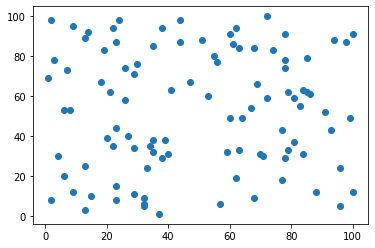

In [2]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import random
%matplotlib inline

X = [random.randint(0,100) for _ in range(100)]
Y = [random.randint(0,100) for _ in range(100)]

plt.scatter(X,Y)

In [4]:
trainning_data = [[x,y] for x,y in zip(X,Y)]
cluster = KMeans(n_clusters=6, max_iter=100)
cluster.fit(trainning_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
cluster.cluster_centers_

array([[54.33333333, 83.53333333],
       [76.15      , 27.25      ],
       [26.1875    , 38.3125    ],
       [17.41176471, 81.82352941],
       [83.21052632, 69.10526316],
       [20.46153846, 10.23076923]])

In [6]:
cluster.labels_

array([0, 2, 0, 2, 5, 4, 1, 3, 5, 1, 1, 3, 2, 3, 3, 1, 1, 0, 2, 1, 3, 1,
       4, 5, 3, 1, 0, 3, 2, 3, 4, 4, 4, 2, 5, 3, 3, 4, 2, 0, 5, 1, 1, 0,
       2, 2, 5, 1, 0, 1, 2, 1, 1, 3, 4, 1, 4, 0, 3, 5, 2, 0, 0, 4, 4, 5,
       4, 1, 2, 3, 0, 0, 4, 1, 5, 1, 2, 3, 4, 5, 2, 5, 3, 0, 2, 4, 1, 4,
       3, 1, 4, 4, 0, 2, 5, 5, 4, 4, 3, 0])

In [17]:
from collections import defaultdict
centers = defaultdict(list)
centers_class = defaultdict(list)

for label, location in zip(cluster.labels_, trainning_data):
    centers_class[label].append(location)

for label, center in zip([0,1,2,3,4,5],cluster.cluster_centers_):
    centers[label]=center

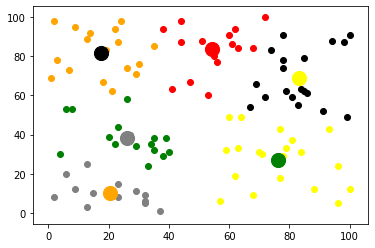

In [18]:
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

plt.figure(2)
for i,key in enumerate(centers_class):
    for location in centers_class[key]:
        plt.scatter(*location, c=color[i])

for i,key in enumerate(centers):
    plt.scatter(*centers[key], s=200, c=color[i])

# Activation Function

In [19]:
def relu(x):
    return x if x>0 else 0

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

def linear():
    w,b = random.randint(-100,100), random.randint(-100,100)
    def _wrap(x):
        return w*x+b
    return _wrap

In [22]:
import random
import numpy as np

X = np.linspace(-1000, 1000, 4000)

In [23]:
X

array([-1000.        ,  -999.49987497,  -998.99974994, ...,
         998.99974994,   999.49987497,  1000.        ])

In [24]:
L = linear()

In [30]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [31]:
sigmoid(1)

0.7310585786300049

In [34]:
def add_1(x):
    return x+1

def add_2(x):
    return x+2

from functools import reduce

initial = 0

def chain(funcs, x):
    last_value = funcs[0](x)
    if len(funcs)==1: return last_value
    else:
        return chain(funcs[1:], last_value)

In [35]:
chain([add_1, add_2, add_2, add_1], 0)

6

In [36]:
def tanh(x):
    return np.tanh(x)

In [44]:
computing_chain = [linear(), relu, linear(), relu, linear(), relu]
Y = [chain(computing_chain, x) for x in X]

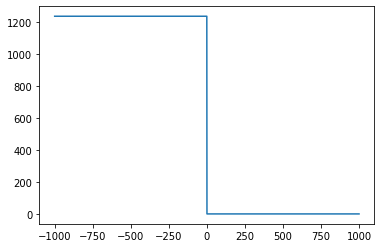

In [45]:
plt.plot(X,Y)